# Sky Brightness

In [30]:
# Check the version of MAF - the output should be version 2.4.2 or higher.
# 'unknown' means you're running from a git repo version,
# and have made changes to your local code

import lsst.sims.maf
lsst.sims.maf.__version__

'2.13.0.sims-59-g0a27faef'

In [31]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# import our python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

# Config

In [33]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = {'u': 'cyan', 'g': 'g', 'r': 'y','i': 'r', 'z': 'm', 'y': 'k'}
Nfilt=len(filters)

In [34]:
all_sqlconstraint=[]
all_bundlename=[]
for f in filters:
    sqlconstraint = 'filter = \"{}\"'.format(f)
    bundlename    = 'bund{}'.format(f) 
    all_sqlconstraint.append(sqlconstraint)
    all_bundlename.append(bundlename)

In [35]:
all_sqlconstraint

['filter = "u"',
 'filter = "g"',
 'filter = "r"',
 'filter = "i"',
 'filter = "z"',
 'filter = "y"']

In [36]:
all_bundlename

['bundu', 'bundg', 'bundr', 'bundi', 'bundz', 'bundy']

# Simu data

In [37]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

#opsdb = db.OpsimDatabase('baseline2018a.db')
opsdb = db.OpsimDatabase('/Users/dagoret/DATA/Cadence/baseline2018a.db')
outDir = 'output_skybrightness'
resultsDb = db.ResultsDb(outDir=outDir)

# Metrics

In [38]:
# metric = the "maximum" of the "skybrightness" for each group of visits in the slicer
metric1 = metrics.AbsMeanMetric('skyBrightness')


# slicer = a grouping or subdivision of visits for the simulated survey
# based on their position on the sky (using a Healpix grid)
#slicer1 = slicers.OneDSlicer(sliceColName='night', binsize=10)
slicer1 = slicers.OneDSlicer(sliceColName='night', binsize=1, binMin=0, binMax=365*10)

# sqlconstraint = the sql query (or 'select') that selects all visits in r band
sqlconstraint = 'filter = "r"'

# MetricBundle = combination of the metric, slicer, and sqlconstraint
averSkyBrightness = metricBundles.MetricBundle(metric1, slicer1, sqlconstraint)

# Bundle

In [39]:
bundles = {}
for ifilt in np.arange(Nfilt):
    sqlconstraint = all_sqlconstraint[ifilt]
    bundlename    = all_bundlename[ifilt]

    bundles[bundlename] = metricBundles.MetricBundle(metric1, slicer1, sqlconstraint)
    print(bundles[bundlename].dbCols)

{'skyBrightness', 'night'}
{'skyBrightness', 'night'}
{'skyBrightness', 'night'}
{'skyBrightness', 'night'}
{'skyBrightness', 'night'}
{'skyBrightness', 'night'}


In [40]:
bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir, 
                                         resultsDb=resultsDb)

Querying database SummaryAllProps with constraint filter = "r" for columns ['skyBrightness', 'night']
Found 515172 visits
Running:  ['bundr']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "y" for columns ['skyBrightness', 'night']
Found 445157 visits
Running:  ['bundy']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "i" for columns ['skyBrightness', 'night']


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/slicers/oneDSlicer.py:74: UserWarning: Both binsize and bins have been set; Using binsize 1.000000 only.
  warnings.warn('Both binsize and bins have been set; Using binsize %f only.' %(self.binsize))


Found 514481 visits
Running:  ['bundi']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "z" for columns ['skyBrightness', 'night']
Found 486208 visits
Running:  ['bundz']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" for columns ['skyBrightness', 'night']
Found 177538 visits
Running:  ['bundu']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" for columns ['skyBrightness', 'night']
Found 234144 visits
Running:  ['bundg']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r"" constraint now.
Plotting complete.
Plotting figures with "filter = "y"" constraint now.
Plotting complete.
Plotting figures with 

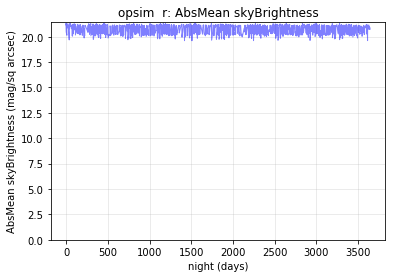

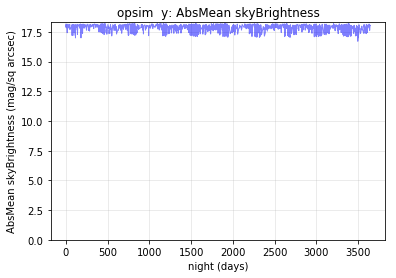

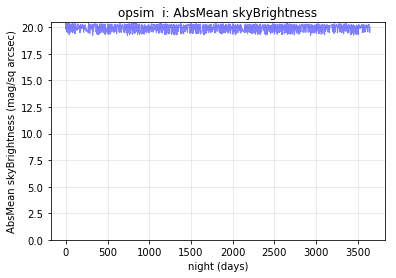

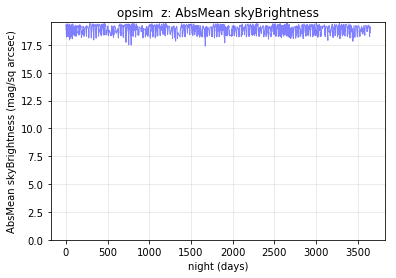

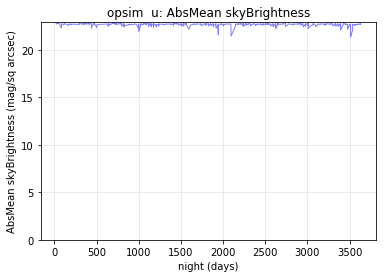

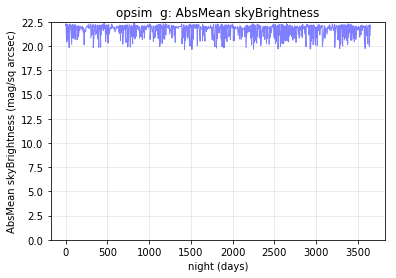

In [41]:
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [42]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    print("===============================",filters[ifilt],"===============================")
    print(bundles[bundlename].dbCols)
    print(len(bundles[bundlename].metricValues))
    print(bundles[bundlename].metricValues[0:20])
    print(bundles[bundlename].summaryValues)
    

=============================== u ===============================
{'skyBrightness', 'night'}
3660
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
{}
=============================== g ===============================
{'skyBrightness', 'night'}
3662
[-- -- -- -- -- -- -- 22.127234389721522 22.32046052009684 -- --
 21.63873426888712 -- -- -- -- -- -- -- 20.44932788203679]
{}
=============================== r ===============================
{'skyBrightness', 'night'}
3652
[-- -- 21.17036322818152 21.315445620404628 -- -- 20.46675275182513 -- --
 -- -- -- -- -- 20.14284988254319 21.27303575163822 -- 20.850445505833
 20.91064500853297 --]
{}
=============================== i ===============================
{'skyBrightness', 'night'}
3656
[-- -- -- -- 20.213494910067293 20.397883169307942 19.776984228376485 --
 20.39576037824505 -- -- -- -- -- -- -- 19.61570082417697
 19.92513444484546 19.646009980173254 20.081875276491587]
{}
=============================== z ===================

In [43]:
summaryMetrics = [metrics.MinMetric(), metrics.MedianMetric(),
                  metrics.MaxMetric(), metrics.RmsMetric()]

In [44]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    print("===============================",filters[ifilt],"===============================")
    bundles[bundlename].setSummaryMetrics(summaryMetrics)

=============================== u ===============================
=============================== g ===============================
=============================== r ===============================
=============================== i ===============================
=============================== z ===============================
=============================== y ===============================


In [45]:
bgroup.runAll()

Querying database SummaryAllProps with constraint filter = "r" for columns ['skyBrightness', 'night']
Found 515172 visits
Running:  ['bundr']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "y" for columns ['skyBrightness', 'night']
Found 445157 visits
Running:  ['bundy']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "i" for columns ['skyBrightness', 'night']
Found 514481 visits
Running:  ['bundi']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "z" for columns ['skyBrightness', 'night']
Found 486208 visits
Running:  ['bundz']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" f

In [46]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    print("===============================",filters[ifilt],"===============================")
    print(bundles[bundlename].dbCols)
    #print(len(bundles[bundlename].metricValues))
    #print(bundles[bundlename].metricValues[0:20])
    print(bundles[bundlename].summaryValues)

=============================== u ===============================
{'skyBrightness', 'night'}
{'Min': 21.38228442656814, 'Median': 22.725246559687786, 'Max': 22.839132547146285, 'Rms': 0.14658229602622308}
=============================== g ===============================
{'skyBrightness', 'night'}
{'Min': 19.65709148281749, 'Median': 21.945957053934343, 'Max': 22.334558337134823, 'Rms': 0.5946608644185515}
=============================== r ===============================
{'skyBrightness', 'night'}
{'Min': 19.600182322342402, 'Median': 20.992447527140243, 'Max': 21.32519907079557, 'Rms': 0.4038924970740631}
=============================== i ===============================
{'skyBrightness', 'night'}
{'Min': 19.21378767216246, 'Median': 20.031161414297276, 'Max': 20.40185330474282, 'Rms': 0.29978179328430515}
=============================== z ===============================
{'skyBrightness', 'night'}
{'Min': 17.395567492090198, 'Median': 18.82125872866705, 'Max': 19.423960806075737, 'Rms':

Text(0, 0.5, 'average night sky brightness')

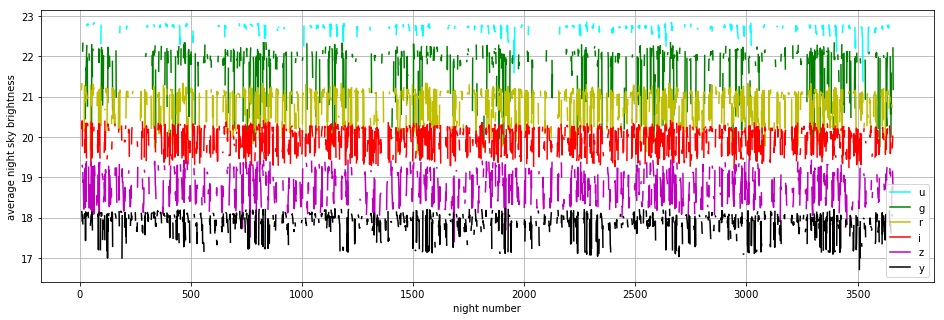

In [62]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(111)
for ifilt in np.arange(Nfilt):
    
    bundlename = all_bundlename[ifilt]
    #plt.plot(bundles[bundlename].metricValues,'-',color=colors[ifilt],label=filters[ifilt])
    ax.plot(bundles[bundlename].metricValues,'-',color=colors[filters[ifilt]] ,label=filters[ifilt])
    
ax.legend()
ax.grid()
ax.set_xlabel("night number")
ax.set_ylabel("average night sky brightness")
    